In [1]:
import pandas as pd
pd.__version__

'1.2.4'

In [2]:
pd.__name__

'pandas'

### 2.2. Pandas.Series
Series как структура данных
Series - упорядоченная изменяемая коллекция объектов, имеющая, так называемые, ассоциативные метки (индексы). Эту структуру можно сравнить со списком: каждому элементу ставится в соответствие индекс, однако в отличие от списка индексами могут быть не только порядковые номера, но и что угодно, например названия компаний, даты, идентификаторы, наименования продуктов. Также каждой Series присваивается тип данных ее элементов (например int64) и может быть определено имя всего массива. В итоге мы получаем некоторый гибрид списка и словаря.

###  Cоздание объекта Series
Для создания объекта Series используется команда pd.Series(). Рассмотрим несколько способов создания Series на примере со списком названий стран.

Способ 1: из списка с использованием параметров функции pd.Series():

In [3]:
##### Способ 1: из списка с использованием параметров функции pd.Series():
countries = pd.Series(
    data = ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ'],
    name = 'countries'
)
display(countries)


UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

In [4]:
##### Способ 2: из словаря, в котором ключами являются будущие метки, а значениями - будущие значения Series, 
# при этом использование параметра name так же возможно:
countries = pd.Series({
    'UK': 'Англия',
    'CA': 'Канада',
    'US' : 'США',
    'RU': 'Россия',
    'UA': 'Украина',
    'BY': 'Беларусь',
    'KZ': 'Казахстан'},
    name = 'countries'
)
display(countries)


UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: countries, dtype: object

In [156]:
#countries.iloc[:,:-1]

In [5]:
countries.iloc[3:6]

RU      Россия
UA     Украина
BY    Беларусь
Name: countries, dtype: object

In [6]:
countries.loc[['CA','KZ']]

CA       Канада
KZ    Казахстан
Name: countries, dtype: object

In [7]:
x=''
for abbrev in countries.index:
    print(countries.loc[abbrev])
    if countries.loc[abbrev]=='Украина':
        x=abbrev
print(x)

Англия
Канада
США
Россия
Украина
Беларусь
Казахстан
UA


Функция, которая принимает на вход страну, а возвращает аббревиатуру. 

In [8]:
def get_country(country, countries):
    x=''
    for abbrev in countries.index:
        if countries.loc[abbrev]==country:
            x=abbrev
    return x

In [9]:
def get_country(country, countries):
    for abbrev in countries.index:
        if countries.loc[abbrev]==country:
            return abbrev

In [10]:
get_country('Россия', countries)

'RU'

In [11]:
get_country_lambda= lambda country: [abbrev for abbrev in countries.index  if countries.loc[abbrev]==country][0]

In [12]:
get_country_lambda('Россия')

'RU'

## Доступ к данным в Series
Доступ к элементам осуществляется с использованием loc или iloc.
.loc вызывается с квадратными скобками, в которые передаются метки. В него можно передать как один индекс, так и список, чтобы получилось несколько элементов. 
В случае обращения по одному индексу возвращается строка, если же обратиться по нескольким элементам возвращается объект Series.
Например для получения имени страны по коду “US” нужно выполнить следующий код:

In [13]:
print(countries.loc['US'])

США


Для того, чтобы достать информацию по нескольким индексам необходимо интересующие индексы обернуть в список:

In [14]:
print(countries.loc[['US', 'RU', 'UK']])

US       США
RU    Россия
UK    Англия
Name: countries, dtype: object


.iloc также вызывается с квадратными скобками и принимает на вход порядковые номера элементов Series. (нумерация начинаются с 0). В него можно так же передавать как один индекс, так и диапазон чисел. 
Например для получения элемента по индексу “KZ” нужно обратиться через iloc по номеру 6:


In [15]:
print(countries.iloc[6])

Казахстан


Получим срез из исходной Series с 1 по 3 элемент. Берутся элементы с порядковыми номерами от 0 до 4, не включая последний

In [16]:
print(countries.iloc[1:4])

CA    Канада
US       США
RU    Россия
Name: countries, dtype: object


##### Способы 3 и 4
loc и iloc можно опустить и обращаться к элементам Series напрямую по индексам, например countries[[‘UK’, 'US', ‘UA’]] или countries[[0, 2, 4]. Оба варианта являются равноправными для Series, однако в дальнейшем для работы с DataFrame, в контексте этой структуры эти варианты не являются синонимичными.

                                                                                                                                    

In [17]:
countries[['UK', 'US', 'UA']]

UK     Англия
US        США
UA    Украина
Name: countries, dtype: object

In [18]:
countries[[0, 2, 4]]

UK     Англия
US        США
UA    Украина
Name: countries, dtype: object

##### Способы 5 и 6: задать data, index, name

In [19]:
pd.Series(["Апельсин", "Киви", "Мандарин", "Яблоко"], ["а", "к", "м", "я"]) #нет name

а    Апельсин
к        Киви
м    Мандарин
я      Яблоко
dtype: object

In [20]:
pd.Series(data=["Апельсин", "Киви", "Мандарин", "Яблоко"], index = ["а", "к", "м", "я"], name = "fruits")


а    Апельсин
к        Киви
м    Мандарин
я      Яблоко
Name: fruits, dtype: object

In [21]:
pd.Series({'а': "Апельсин", 'м': 'Мандарин', 'к': 'Киви', 'я': 'Яблоко'}, name='fruits')

а    Апельсин
м    Мандарин
к        Киви
я      Яблоко
Name: fruits, dtype: object

In [22]:
pd.Series(["Апельсин", "Киви", "Мандарин", "Яблоко"], name='fruits') # нет индексов


0    Апельсин
1        Киви
2    Мандарин
3      Яблоко
Name: fruits, dtype: object

In [23]:
FRUITS= pd.Series(["Апельсин", "Киви", "Мандарин", "Яблоко"], ["а", "к", "м", "я"])
FRUITS

а    Апельсин
к        Киви
м    Мандарин
я      Яблоко
dtype: object

Какими из нижеперечисленных способов можно достать из нее числа 6, 7 и 9:

In [24]:
my_series = pd.Series(data=[5, 6, 7, 8, 9, 10],  index=['a', 'b', 'c', 'd', 'e', 'f'])

In [25]:
my_series[[1, 2, 4]]

b    6
c    7
e    9
dtype: int64

In [26]:
my_series[['b', 'c', 'e']]

b    6
c    7
e    9
dtype: int64

In [27]:
print(my_series.iloc[[1, 2, 4]])

b    6
c    7
e    9
dtype: int64


In [28]:
print(my_series.loc[['b', 'c', 'e']])

b    6
c    7
e    9
dtype: int64


Задание 2.2.4. (Андрей Рысистов)
В аптеку поступила новая поставка: Хлоргексидин - 15 штук, Синтомицин - 18 штук, Левомеколь - 7 штук. Создайте Series medications, индексами которой являются названия лекарств, а значениями - их количество в поставке. Найдите, разницу между количеством Хлоргексидина и Левомеколя в поставке. Результат запишите в переменную diff. 

In [29]:
#НЕВЕРН РАССТАВЛЕНЫ ДАННЫЕ И ИНДЕКСЫ
medications=pd.Series(
data=['Хлоргексидин' , 'Синтомицин', 'Левомеколь'],
index=[15, 18, 7],
name = 'medications'
)
medications

15    Хлоргексидин
18      Синтомицин
7       Левомеколь
Name: medications, dtype: object

In [30]:
medications_verno=pd.Series(
data=[15, 18, 7],
index=['Хлоргексидин' , 'Синтомицин', 'Левомеколь'],
name = 'medications'
)
medications_verno

Хлоргексидин    15
Синтомицин      18
Левомеколь       7
Name: medications, dtype: int64

In [31]:
medications_verno['Хлоргексидин']-medications_verno['Левомеколь']

8

In [32]:
medications2=pd.Series({
'Хлоргексидин': 15,
'Синтомицин': 18,
'Левомеколь': 7,
},
name = 'medications___3'
)

medications2

Хлоргексидин    15
Синтомицин      18
Левомеколь       7
Name: medications___3, dtype: int64

In [33]:
medications2[["Хлоргексидин"]]-medications2[['Левомеколь']]

Левомеколь     NaN
Хлоргексидин   NaN
Name: medications___3, dtype: float64

In [34]:
medications2=pd.Series({
'Хлоргексидин': 15,
'Синтомицин': 18,
'Левомеколь': 7,
},
name = 'medications___3'
)

medications2["Хлоргексидин"]-medications2['Левомеколь']

8

## Pandas.DataFrame

DataFrame является двумерной структурой и представляется в виде таблицы, в которой есть строки и столбцы. Столбцами в DataFrame выступают объекты Series, а строки формируются из их элементов. Также в DataFrame есть метки (индексы), которые соответствуют каждой строке таблицы.

##### Создание DataFrame
DataFrame создается с помощью функции pd.DataFrame(). Так же, как и для Series, для создания объектов DataFrame есть несколько способов:
##### Способ 1 Из словаря, ключами которого являются имена столбцов будущей таблицы, а по значениям этого словаря  - списки, в которых хранится содержимое этих столбцов

In [35]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})
countries_df.index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
display(countries_df)

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


In [36]:
#countries_df.loc[1]
countries_df.loc[['UK', 'US', 'BY', 'KZ'],['population', 'square']]

,population,square
UK,56.29,133396
US,322.28,9826630
BY,9.50,207600
KZ,17.04,2724902


In [37]:
countries_df.iloc[[2,5,6],[1, 2]]

,population,square
US,322.28,9826630
BY,9.50,207600
KZ,17.04,2724902


In [38]:
# так как мы не задали метки (индексы) DataFrame они были сгенерированы автоматически. Исправим это, задав индексы вручную:
countries_df.index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
display(countries_df)

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


In [157]:
countries_df.iloc[:,:-1]

,country,population
0,Англия,56.29
1,Канада,38.05
2,США,322.28
3,Россия,146.24
4,Украина,45.50
5,Беларусь,9.50
6,Казахстан,17.04


##### countries_df.iloc[:,-1:] # первая :- все строки, после запятой указание на столбцы

In [165]:
countries_df.iloc[:,-1:] # первая :- все строки, посое запятой указание на столбцы

,square
0,133396
1,9984670
2,9826630
3,17125191
4,603628
5,207600
6,2724902


In [158]:
countries_df.iloc[:,:]

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


In [159]:
countries_df.iloc[::]

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


In [160]:
countries_df.iloc[:-1]

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600


Создать столбец с плотностью населения, которая рассчитывается как количество населения, делённое на площадь страны (человек на км)

In [39]:
countries_df['population']

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

In [40]:
countries_df['density']=(1000000*countries_df['population'])/countries_df['square']
countries_df

,country,population,square,density
UK,Англия,56.29,133396,421.976671
CA,Канада,38.05,9984670,3.810842
US,США,322.28,9826630,32.796595
RU,Россия,146.24,17125191,8.539467
UA,Украина,45.50,603628,75.377550
BY,Беларусь,9.50,207600,45.761079
KZ,Казахстан,17.04,2724902,6.253436


Найти страну с максимальной плотностью 

In [41]:
countries_df.iloc[0][0]

'Англия'

In [42]:
countries_df['density'].max()

421.97667096464664

In [43]:
strana=0
idx=0
for dense in  countries_df['density']:
    if countries_df['density'].max()==dense:
        
        strana = countries_df.iloc[idx][0]
    idx=idx+1
print(strana)

Англия


In [44]:
max_density=countries_df.density.max()
for country in countries_df.index:
    if countries_df.loc[country, 'density']==max_density:
        print(countries_df.loc[country, 'country'])

Англия


In [45]:
countries_df.density.idxmax()

'UK'

In [46]:
#Написать функцию, которая сама определяет, каким методом нужно прочитать файл по расширению. 
#Расширение файла указывается через точку в конце имени файла. 
#на вход приходит resieps.json 

filename='data/countries.csv'
format_file=filename.split('.')[-1]
if format_file=='csv':
    data=pd.read_csv(filename, sep=';')

In [47]:
data

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


In [48]:
def read_file(path):
    format_file=path.split('.')[-1]
    if format_file=='csv':
        data=pd.read_csv(filename, sep=';')
    elif format_file=='json':
        data=pd.read_json(filename)
    return data

In [49]:
#Ключи - форматы, а по значению - функции, которые мы не вызываем. 
# По умолчанию сепаратора нет, но если  он нужен (например, csv), то мы задаём его значение. 
# А если не нужен, то он по умолчанию пуст и он не вызывается (например, json)
call_func={'csv': pd.read_csv, 'json': pd.read_json}
def read_file(path, call_func, sep=''):
    format_file=path.split('.')[-1]
    data=call_func[format_file](path, sep =sep)

    return data

In [50]:
read_file('data/countries.csv',call_func, sep=';')

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


### Обращение к столбцу по номеру

In [51]:
countries_df[countries_df.columns[0]]

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: country, dtype: object

In [52]:
countries_df.iloc[:, 0]

UK       Англия
CA       Канада
US          США
RU       Россия
UA      Украина
BY     Беларусь
KZ    Казахстан
Name: country, dtype: object

##### Способ 2: создать DataFrame из вложенного списка, внутренние списки которого будут являться строками новой таблицы:

In [53]:
countries_df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
        ['Россия', 146.24, 17125191],
        ['Украина', 45.5, 603628],
        ['Беларусь', 9.5, 207600],
        ['Казахстан', 17.04, 2724902]
    ],
    columns= ['country', 'population', 'square'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
)


In [54]:
countries_df

,country,population,square
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


##### Axis в DataFrame
Как уже было сказано, DataFrame является двумерной структурой данных, что означает наличие двух возможных направлений движения в ней: вдоль строк и вдоль столбцов. 
Так, например, мы можем удалять как строки, так и столбцы таблицы, вычислять среднее значение как по столбцам, так и по строкам таблицы. 
Важно при работе с Pandas уметь указывать направление работы метода, который используется.
Для этого в Pandas вводится понятие axis (ось, координата), строки в таблице обозначаются axis с индексом 0, а столбцы - axis с индексом 1.
Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, т.е. они выполняют операции со строками, если не задавать axis вручную.
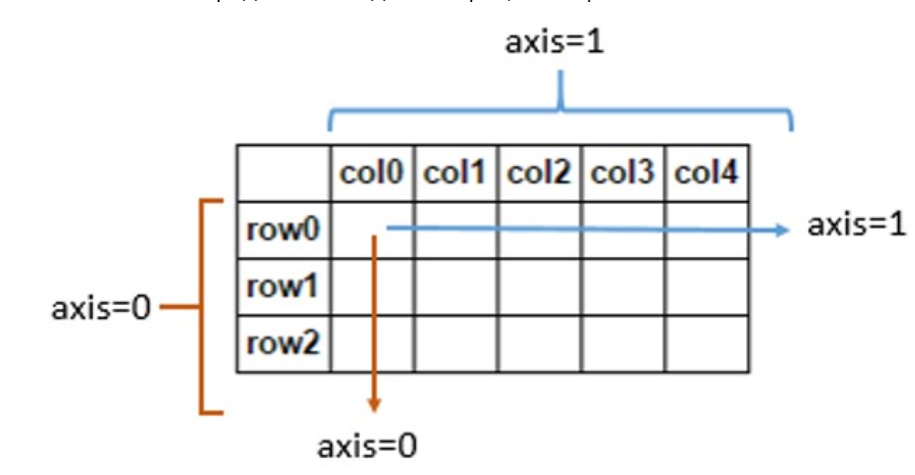

In [55]:
#Считаем среднее по строкам (axis = 0) в каждом столбце:
countries_df.mean(axis=0)

population    9.070000e+01
square        5.800860e+06
dtype: float64

In [56]:
#Считаем среднее по столбцам (axis=1) в каждой строке:
countries_df.mean(axis=1)

UK      66726.145
CA    4992354.025
US    4913476.140
RU    8562668.620
UA     301836.750
BY     103804.750
KZ    1362459.520
dtype: float64

##### Доступ к данным в DataFrame
Доступ к столбцу можно получить разными способами: 

Можно обратиться по имени столбца к DataFrame через точку: countries_df.population


In [57]:
countries_df.population


UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

Для того, чтобы получить доступ к ячейкам в таблице используются уже знакомые нам loc и iloc.
При этом в соответствии с механизмом работы axis: при обращении к DataFrame по индексам с помощью loc (iloc) первым индексом указывается индекс (порядковый номер), соответствующий строкам, а вторым - имя (порядковый номер) столбца.
Рассмотрим на примерах:


In [58]:
#Получим площадь Англии:
variant1_1=countries_df.loc['UK', 'square']
variant1_2=countries_df.iloc[0, 2]
variant1_1

133396

In [59]:
#Получим население и площадь, соответствующие России:
variant2_1=countries_df.loc['RU', ['population', 'square']]

variant2_2=countries_df.iloc[3, 1:3]
variant2_2

population      146.24
square        17125191
Name: RU, dtype: object

In [60]:
#Сделаем вырезку из таблицы и возьмем информацию о населении и площади, соответствующую Украине, Беларуси и Казахстану:
variant3_1= countries_df.loc[['UA', 'BY', 'KZ'],['population', 'square']]
variant3_2=countries_df.iloc[4:8, 1:3]
variant3_1

,population,square
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902


Задание 2.3.5 Андрей

2.3.5. Расходы компании ScienceYou составили 156, 130 и 270 единиц за 2018, 2019 и 2020 года соответственно. А доходы составили 478, 512 и 196 единиц за этот же промежуток времени. 
Создайте DataFrame company_data соответствующий таким данным со столбцами “Расходы” и “Доходы” и индексами равными годам рассматриваемого периода.
Напишите код, который создаст заявленную таблицу и найдите разницу между доходами и расходами за 2020 год, результат занесите в переменную diff. 


In [61]:
company_data = pd.DataFrame({
    'Расходы': [156, 130, 270],
    'Доходы': [478, 512, 196]
    },
    index = [2018, 2019, 2020]
)

In [62]:
company_data

,Расходы,Доходы
2018,156,478
2019,130,512
2020,270,196


In [63]:
diff=company_data.iloc[2,1]-company_data.iloc[2,0]
diff

-74

In [64]:
profit=company_data.loc[2020, 'Доходы']-company_data.loc[2020, 'Расходы']
profit

-74

## 2.4. Работа с различными источниками данных в Pandas
Из рассмотренных ранее примеров создания DataFrame становится понятно, что создавать таблицы вручную довольно проблематично и затратно по объему кода и времени его написания. Возникает вопрос: всегда ли так приходится делать? Ответ - конечно же не всегда.
При работе DS чаще всего сталкивается с уже собранными данными, хранящимися в виде файлов и других источников, таких как базы данных и web-источники. Проблема заключается в том, что каждый источник данных представляет разных формат: например, если данные приходят к вам из отдела бухгалтерии, то это, скорее всего будет формат Excel-таблицы,  результаты web-запросов чаще всего представлены в формате JSON или XML и так далее.
Благодаря функциональности Pandas можно быстро и легко читать данные и преобразовывать их в DataFrame из самых распространенных форматов. При этом данные могут быть прочитаны с вашего диска или же по сети. Более того, раз данные можно прочитать, значит их можно и сохранить, для этого Pandas также предоставляет возможности.
Запись в csv файл:
Предположим, что мы захотели сохранить созданный нами ранее DataFrame. Самым простым и распространенным источником табличных данных является формат csv(comma-separated values). В данном формате ячейки таблицы обозначаются некоторым разделителем, чаще всего запятой, либо точкой с запятой.
Экспорт данных в данный формат осуществляется с помощью метода DataFrame to_csv().  
Разберем основные параметры этого метода:
path_or_buf - путь до файла, в который будет записан DataFrame (например “data/my_data.csv”)
sep -  разделитель данных в выходном файле (по умолчанию ',');
decimal - разделитель чисел на целую и дробную часть в выходном файле (по умолчанию '.')
columns - список столбцов, которые нужно записать в файл (по умолчанию записываются все столбцы)
index - создавать ли дополнительный столбец с индексами строк в файле (по умолчанию True)
Заранее создадим папку data в директории, где лежит наш ноутбук. Теперь давайте сохраним наш DataFrame с информацией о странах в формате csv в файл с именем countries.csv в эту папку. При этом укажем, что разделителем в нашем файле будет являться символ ‘;’, а также то, что нам не нужен дополнительный столбец с индексами строк:


In [65]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

countries_df.to_csv('data/countries.csv', index=False, sep=';')


Данные, прочитанные выше еще понадобятся нам в этом модуле, а пока предлагаем ознакомимся еще с несколькими методами:

Запись и чтение в других форматах

Как уже говорилось ранее, Pandas способен работать со многими распространенными форматами данных. Ниже приведен список методов и документация по ним для записи таблиц в форматы, отличные от csv:

to_excel() - запись DataFrame в формат Excel-таблицы (.xslx).

to_json() - запись DataFrame в формат JSON (.json)

to_xml() - запись DataFrame в формат XML-документа (.xml)

to_sql() - запись DataFrame в базу данных SQL (для реализации этого метода необходимо установить соединение с базой данных)

Аналогично приведем список методов и документацию по ним для чтения таблиц из форматов, отличных от csv:
read_excel() - чтение из формата Excel-таблицы(.xslx) в DataFrame

read_json() - чтение из формата JSON (.json) в DataFrame

read_xml() - чтение из формата XML-документа (.xml) в DataFrame

read_sql() - чтение из базы данных SQL в DataFrame (так же необходимо установить соединение с базой данных)

Итак, мы с вами рассмотрели, как можно записывать данные из DataFrame в файл и читать их из него. Эти навыки понадобятся в дальнейшем нам при работе с реальными данными и их анализе. А пока предлагаем вам закрепить полученные знания, выполнив следующие задания.


При успешном выполнении кода в вашей директории data должен появится файл countries.csv, который вы даже можете открыть в редакторе и посмотреть его содержимое.
Чтобы более подробно ознакомиться с методом to_csv() предлагаем обратиться к документации.
Чтение csv файла:
Для чтения таблицы из csv файла используется функция модуля Pandas read_csv. Функция возвращает DataFrame и имеет несколько важных параметров:
filepath_or_buffer - путь до файла, который мы читаем
sep — разделитель данных (по умолчанию ',')
decimal - разделитель чисел на целую и дробную часть в выходном файле (по умолчанию '.')
names - список с названиями столбцов для чтения
skiprows - количество строк в файле, которые нужно пропустить (например файл может содержать служебную информацию, которая нам не нужна)
Убедимся, что сохраненными нами ранее файл создался верно. Для этого прочитаем его в переменную countries_data и выведем ее на экран. Не забудем о том, что мы использовали в качестве разделителя ‘;’.


##### Чтение csv файла по ссылке:
На самом деле файл с данными не обязательно должен храниться у вас на компьютере. Если он находится в открытом доступе по ссылке (например на GoogleDisk или GitHub), то его можно прочитать и из интернета, для этого достаточно в функции read_csv вместо пути до файла указать ссылку на файл. Например:


In [66]:
data = pd.read_csv('https://raw.githubusercontent.com/AndreyRysistov/VebinarDST/main/melb_data.csv')
display(data)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [67]:
#Домашнее задание: разобрать файл до конца. Задания на фильтрацию, данные настоящие. Чтение из файла, анализ файлов, выводы

Описание датасета melb_data.csv (Мельбурн, Австралия)


index - номер строки

Suburb - наименование пригорода

Address - адрес

Rooms - количество комнат в помещении

Type - тип здания (h - дом, коттедж, вилла, терраса; u - блочный, дуплексный дом; t - таунхаус)

Price - цена помещения

Method - метод продажи 

SellerG - риэлторская компания

Date - дата продажи (в формате день/месяц/год)

Distance - расстояния до объекта от центра Мельбурна 

Postcode - почтовый индекс

Bedroom - количество спален

Bathroom - количество ванных комнат

Car - количество парковочных мест

Landsize - площадь прилегающей территории

BuildingArea - площадь здания

YearBuilt - год постройки

CouncilArea - региональное управление

Latitude - географическая широта

Longitude - географическая долгота

Regionname - наименование района Мельбурна

Propertycount - количество объектов недвижимости в районе

Coordinates - широта и долгота, объединенные в кортеж

Исходный датасет и более детальное описание к нему  находится здесь https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [68]:
#Прочитаем наши данные о недвижимости из csv файла и запишем результирующий DataFrame в переменную melb_data:
melb_data = pd.read_csv('data/melb_data.csv', sep=',')

In [69]:
melb_data.shape

(13580, 23)

In [70]:
melb_data.head(7)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,"-37.8072, 144.9941"
5,5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,...,0.0,181.0,126.0,1970.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0,"-37.8041, 144.9953"
6,6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,"-37.8024, 144.9993"


In [71]:
melb_data.tail(7)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
13573,13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,...,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0,"-37.89327, 144.64789"
13574,13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,...,2.0,256.0,126.0,1970.0,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0,"-37.67917, 144.8939"
13575,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,2.0,652.0,126.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,"-37.90562, 145.16761"
13576,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,"-37.85927, 144.87904"
13577,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,4.0,436.0,126.0,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,"-37.85274, 144.88738"
13578,13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,"-37.85908, 144.89299"
13579,13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,"-37.81188, 144.88449"


In [72]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          13580 non-null  int64  
 1   Suburb         13580 non-null  object 
 2   Address        13580 non-null  object 
 3   Rooms          13580 non-null  int64  
 4   Type           13580 non-null  object 
 5   Price          13580 non-null  float64
 6   Method         13580 non-null  object 
 7   SellerG        13580 non-null  object 
 8   Date           13580 non-null  object 
 9   Distance       13580 non-null  float64
 10  Postcode       13580 non-null  int64  
 11  Bedroom        13580 non-null  float64
 12  Bathroom       13580 non-null  float64
 13  Car            13580 non-null  float64
 14  Landsize       13580 non-null  float64
 15  BuildingArea   13580 non-null  float64
 16  YearBuilt      13580 non-null  float64
 17  CouncilArea    12211 non-null  object 
 18  Lattit

In [73]:
melb_data.isnull()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [74]:
#Вот эти команды жаь одинаковый результат
print(melb_data.loc[0])
print(melb_data.iloc[0])

index                                0
Suburb                      Abbotsford
Address                   85 Turner St
Rooms                                2
Type                                 h
Price                        1480000.0
Method                               S
SellerG                         Biggin
Date                         3/12/2016
Distance                           2.5
Postcode                          3067
Bedroom                            2.0
Bathroom                           1.0
Car                                1.0
Landsize                         202.0
BuildingArea                     126.0
YearBuilt                       1970.0
CouncilArea                      Yarra
Lattitude                     -37.7996
Longtitude                    144.9984
Regionname       Northern Metropolitan
Propertycount                   4019.0
Сoordinates         -37.7996, 144.9984
Name: 0, dtype: object
index                                0
Suburb                      Abbotsford
Ad

In [75]:
# Какова цена объекта недвижимости под индексом 15?
print(melb_data.Price[15])

print(melb_data.loc[15][5])
print(melb_data.loc[15]['Price'])
print(melb_data.loc[15, 'Price'])

print(melb_data.iloc[15,5])
print(melb_data.iloc[15][5])
print(melb_data.Price.iloc[15])

1310000.0
1310000.0
1310000.0
1310000.0
1310000.0
1310000.0
1310000.0


In [76]:
#Найдите, когда был продан объект под индексом 90
print(melb_data.Date[90])

print(melb_data.loc[90][8])
print(melb_data.loc[90]['Date'])
print(melb_data.loc[90,'Date'])


print(melb_data.iloc[90][8])
print(melb_data.iloc[90,8])
print(melb_data.Date.iloc[90])

10/09/2016
10/09/2016
10/09/2016
10/09/2016
10/09/2016
10/09/2016
10/09/2016


In [77]:
#Найдите во сколько раз площадь участка здания под индексом 3521 больше площади участка здания под индексом 1690. 
#Ответ округлите до целых.
print(round(melb_data.Landsize[3521]/melb_data.Landsize[1690]))

print(round(melb_data.iloc[3521][14]/melb_data.iloc[1690][14]))
print(round(melb_data.iloc[3521,14]/melb_data.iloc[1690,14]))
print(round(melb_data.Landsize.iloc[3521]/melb_data.Landsize.iloc[1690]))

print(round(melb_data.loc[3521][14]/melb_data.loc[1690][14]))
print(round(melb_data.loc[3521,'Landsize']/melb_data.loc[1690,'Landsize']))
print(round(melb_data.loc[3521]['Landsize']/melb_data.loc[1690]['Landsize']))

#Округление в меньшую сторону через целочисленное деление
print(melb_data.loc[3521]['Landsize']//melb_data.loc[1690]['Landsize'])

3
3
3
3
3
3
3
2.0


##### Изменение типа данных столбца
Если присмотреться внимательнее к выводу метода info(), а конкретнее на типы данных столбцов, становится понятно, что некоторые признаки кодируются не совсем корректными типами данных. 
Например, столбцы, которые отражают количество, и по идее должны выражаться целым числом (Car, Bedroom, Bathroom Propertyсount), кодируются числом float64 - числом с плавающей запятой размером 64 бита. 
Столбец Postcode, обозначающий почтовый индекс также кодируется числом float, хотя должен кодироваться целым числом. 
Наконец, столбец с годом постройки (YearBuilt) также представлен в формате числа с плавающей точкой.

Для того, чтобы исправить это, можно воспользоваться методом astype(), который позволяет преобразовать тип данных столбца:


In [78]:
melb_data['Postcode'] = melb_data['Postcode'].astype('int64')
melb_data['Car'] = melb_data['Car'].astype('int64')
melb_data['Bedroom'] = melb_data['Bedroom'].astype('int64')
melb_data['Bathroom'] = melb_data['Bedroom'].astype('int64')
melb_data['Propertycount'] = melb_data['Propertycount'].astype('int64')
melb_data['YearBuilt'] = melb_data['YearBuilt'].astype('int64')
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          13580 non-null  int64  
 1   Suburb         13580 non-null  object 
 2   Address        13580 non-null  object 
 3   Rooms          13580 non-null  int64  
 4   Type           13580 non-null  object 
 5   Price          13580 non-null  float64
 6   Method         13580 non-null  object 
 7   SellerG        13580 non-null  object 
 8   Date           13580 non-null  object 
 9   Distance       13580 non-null  float64
 10  Postcode       13580 non-null  int64  
 11  Bedroom        13580 non-null  int64  
 12  Bathroom       13580 non-null  int64  
 13  Car            13580 non-null  int64  
 14  Landsize       13580 non-null  float64
 15  BuildingArea   13580 non-null  float64
 16  YearBuilt      13580 non-null  int64  
 17  CouncilArea    12211 non-null  object 
 18  Lattit

Подробнее о типах данных можно почитать здесь https://dfedorov.spb.ru/pandas/Обзор%20типов%20данных%20pandas.html 
object - это тип данных, которым в Pandas кодируются текстовые или нечисловые значения (кортежи, списки и т.д.)

#### Описательная статистика
По умолчанию метод работает с числовыми (int64 и float64) столбцами
Подробнее https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html 

In [79]:
melb_data.describe().loc[:, ['Distance', 'BuildingArea' , 'Price']]


,Distance,BuildingArea,Price
count,13580.000000,13580.000000,1.358000e+04
mean,10.137776,139.633972,1.075684e+06
std,5.868725,392.217403,6.393107e+05
min,0.000000,0.000000,8.500000e+04
25%,6.100000,122.000000,6.500000e+05
50%,9.200000,126.000000,9.030000e+05
75%,13.000000,129.940000,1.330000e+06
max,48.100000,44515.000000,9.000000e+06


Замечание: 
Числа с обозначения e+n обозначают 10 в n-ой степени. То есть9.0e+06 = 9*10^6


Какие интересные выводы мы можем сделать исходя из построенной таблицы?

###### Столбец Distance (расстояние до центра города): 

В нашем наборе данных представлены объекты удаленные до 48 километров от центра города.

###### Столбец BuildingAree (площадь здания):

В нашей таблице представлены участки, на которых отсутствует само здание (его площадь равна 0). То есть владельцы продавали только голый участок земли.

Большая часть объектов (75%) имеет площадь здания до 130 квадратных метров, однако в нашей таблице есть настоящий дворец (судя по его размерам) с площадью в 44515 квадратных метра. 

###### Столбец Price (цена):

Диапазон цен на недвижимость в Мельбурне варьируется от 85 тысяч до 9 миллионов австралийских долларов.



Какие интересные выводы мы можем сделать исходя из построенной таблицы?
Столбец Distance (расстояние до центра города): 
В нашем наборе данных представлены объекты удаленные до 48 километров от центра города.
Столбец BuildingAree (площадь здания):
В нашей таблице представлены участки, на которых отсутствует само здание (его площадь равна 0). То есть владельцы продавали только голый участок земли.
Большая часть объектов (75%) имеет площадь здания до 130 квадратных метров, однако в нашей таблице есть настоящий дворец (судя по его размерам) с площадью в 44515 квадратных метра. 
Столбец Price (цена):
Диапазон цен на недвижимость в Мельбурне варьируется от 85 тысяч до 9 миллионов австралийских долларов.



###### include
На самом деле метод describe можно применить не только к числовым признакам. С помощью параметра include можно указать тип данных для которого нужно вывести описательную информацию.
Например, для типа данных object метод describe() возвращает DataFrame, в котором указаны количество непустых строк(count), уникальных значений(count), самое частое значение (top) и частоту - количество использования - этого значения (freq) для каждого столбца типа object исходной таблицы


In [80]:
melb_data.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Сoordinates
count,13580,13580,13580,13580,13580,13580,12211,13580,13580
unique,314,13378,3,5,268,58,33,8,13097
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan,"-37.8361, 144.9966"
freq,359,3,9449,9022,1565,473,1163,4695,12


Также приведем несколько выводов, которые можно сделать из полученной таблицы:
Столбец Suburb (пригород):
Наибольшее количество проданных объектов (359) находилось в пригороде  Reservoir.
Столбец Type (тип здания): 
Самый популярный тип дома - h (дом, вилла, коттедж)
Столбец SellerG (риэлтор): 
В наших данных нам известно о 268 различных риэлторских компаниях, однако самой главной акулой в этом бизнесе является компания Nelson. Она продала 1565 различных домов.
Столбец Date (дата продажи): 
В нашей таблице содержится информация за 58 различных дней, при этом наибольшее число продаж (473) пришлось на 27 мая 2017 года.


###### Получение частоты 
Для того, чтобы определить частоту в столбце, используется метод столбца value_counts(). Данный метод возвращает объект Series в котором по индексам идут уникальные категории столбца, а по значениям - соответствующая им частота.
Рассмотрим метод value_counts() на примере столбца с названиями районов:

In [81]:
melb_data['Regionname'].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [82]:
melb_data['Regionname'].value_counts(normalize=True)

Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: Regionname, dtype: float64

In [83]:
melb_data.describe(include=[object])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Сoordinates
count,13580,13580,13580,13580,13580,13580,12211,13580,13580
unique,314,13378,3,5,268,58,33,8,13097
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan,"-37.8361, 144.9966"
freq,359,3,9449,9022,1565,473,1163,4695,12


In [84]:
melb_data['Type'].value_counts(normalize=True)

h    0.695803
u    0.222165
t    0.082032
Name: Type, dtype: float64

#### 2.7. Статистические методы 
##### Агрегирующие методы
.count()

.mean()

.min()

.max()

.deviance() - дисперсия

.std()

.sum()

.quantile(x) - х-ый квантиль 

Если один из этих методов применить ко всему DataFrame, то в результате его работы будет получен объект типа Series, в котором по индексам будут наименования столбцов, а по значениям - статистический показатель . В случае применения метода к отдельному столбцу, результатом вычислений станет число.

В каждый метод можно передать некоторые параметры, среди которых:

axis — определяет, подсчитывать параметр по строкам или столбцам

numeric_only — определяет, вычислять параметры только по числовым столбцам/строкам или нет (True/False).

Разберем агрегирующие функции на примерах:


In [85]:
# Вычислим среднюю цену на объекты недвижимости:

print(melb_data['Price'].mean())


1075684.079455081


In [86]:
#Найдем максимальное количество парковочных мест:
print(melb_data['Car'].max())

10


In [87]:
#А теперь представим, что риэлторская ставка за продажу недвижимости составляет 12%. 
#Найдем общую прибыльность риэлторского бизнеса в Мельбурне. Результат округлим до сотых:
rate = 0.12
income = melb_data['Price'].sum() * rate
print('Общая риэлторская выручка:', round(income, 2))


Общая риэлторская выручка: 1752934775.88


In [88]:
#Найдем, насколько медианная площадь территории отличается от ее среднего значения. 
#Вычислим модуль разницы между медианой и средним и разделим результат на среднее, чтобы получить отклонение в долях.
landsize_median = melb_data['Landsize'].median() 
landsize_mean =  melb_data['Landsize'].mean()
print(abs(landsize_median - landsize_mean)/landsize_mean)


0.21205713983546193


В результате получаем долю отклонения медианы от среднего значения. Умножив результат на 100, можно получить его в процентах. Отклонение медианы от среднего значения на 21% является довольно большим и это повод задуматься над тем, чтобы исследовать признак на наличие аномалий. 


Модальное значение
Отдельный интерес представляет статический показатель моды - самого распространенного значения в столбце. Он вычисляется с помощью метода mode(). Модальных значений может быть несколько - несколько значений могут встречаться одинаковое количество раз. Поэтому метод mode(), в отличие от агрегационных методов, возвращает не одно число, а серию.
Вычислим, какое число комнат чаще всего представлено на рынке недвижимости:

Замечание:
Метод mode() может быть использован не только с числовыми столбцами, но и со столбцами типа object. Так например следующим кодом можно найти наиболее распространенное имя района.
	

In [89]:
print(melb_data['Rooms'].mode())
print(melb_data['Regionname'].mode())

0    3
dtype: int64
0    Southern Metropolitan
dtype: object


2.7.2. Чему равно максимальное количество домов на продажу в районе? Ответ запишите в виде целого числа.

In [90]:
melb_data['Regionname'].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [91]:
melb_data['Propertycount'].max()

21650

2.7.3. Чему равно стандартное отклонение (разброс) расстояния от центра города до объекта недвижимости. Ответ округлите до целого:

In [92]:
round(melb_data['Distance'].std())

6

In [93]:
building_median = melb_data['BuildingArea'].median() 
building_mean =  melb_data['BuildingArea'].mean()
print(abs(building_median - building_mean)/building_mean)


0.09764079662364533


In [94]:
melb_data['Bedroom'].mode()

0    3
dtype: int64

In [95]:
countries = pd.Series(
data=[1, 2, 4, 2, 3, 2, 1, 5, 6])
countries.mode()

0    2
dtype: int64

### 2.8. Фильтрация данных в DataFrame

Часто бывает ситуация, что нам нужно исследовать определенную группу наших объектов по какому-то условию, например найти здания, с ценой меньше 1 миллиона или выделить из всей нашей таблицы помещения с двумя комнатами.  Такие задачами называются задачами фильтрации.

Под фильтрацией в DataFrame подразумевается получение новой таблицы путем вырезания строк, не удовлетворяющих поставленному условию. 

Разберем классический способ фильтрации в DataFrame с помощью масок.
Маской называется Series, которая состоит из булевых значений, при этом значения True соответствуют тем индексам, для которых заданное условие выполняется, в противном случае ставится значение False (например, цена > 2 млн). Синтаксис получения маски очень прост:

In [96]:
mask = melb_data['Price'] > 2000000
display(mask)


0        False
1        False
2        False
3        False
4        False
         ...  
13575    False
13576    False
13577    False
13578     True
13579    False
Name: Price, Length: 13580, dtype: bool

Для произведения фильтрации нужно просто подставить полученную маску в индексацию DataFrame. Маска показывает, какие строки нужно оставлять в результирующем наборе, а какие убирать (выведем первые 5 строк отфильтрованной таблицы):


In [97]:
display(melb_data[mask].head())

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
80,80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,...,0,211.0,198.0,1890,Port Phillip,-37.8481,144.9499,Southern Metropolitan,3280,"-37.8481, 144.9499"
85,85,Albert Park,104 Richardson St,4,h,2300000.0,S,Marshall,7/05/2016,3.3,...,1,153.0,180.0,1880,Port Phillip,-37.8447,144.9523,Southern Metropolitan,3280,"-37.8447, 144.9523"
88,88,Albert Park,29 Faussett St,2,h,2120000.0,S,Greg,10/09/2016,3.3,...,1,199.0,107.0,1900,Port Phillip,-37.8422,144.9554,Southern Metropolitan,3280,"-37.8422, 144.9554"
92,92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,...,1,177.0,181.0,1880,Port Phillip,-37.8415,144.9585,Southern Metropolitan,3280,"-37.8415, 144.9585"
93,93,Albert Park,23 Finlay St,5,h,2100000.0,S,Greg,10/12/2016,3.3,...,1,237.0,126.0,1970,Port Phillip,-37.8436,144.9557,Southern Metropolitan,3280,"-37.8436, 144.9557"


Замечание
В результате выполнения фильтрации возвращается новый DataFrame, полученный из исходного, при этом исходная таблица melb_data остается без изменений.
Также вовсе необязательно заносить маску в отдельную переменную, вы можете сразу вставлять условие в операцию индексации DataFrame, например:


In [98]:
melb_data[melb_data['Price'] > 2000000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
80,80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,...,0,211.0,198.0,1890,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280,"-37.8481, 144.9499"
85,85,Albert Park,104 Richardson St,4,h,2300000.0,S,Marshall,7/05/2016,3.3,...,1,153.0,180.0,1880,Port Phillip,-37.84470,144.95230,Southern Metropolitan,3280,"-37.8447, 144.9523"
88,88,Albert Park,29 Faussett St,2,h,2120000.0,S,Greg,10/09/2016,3.3,...,1,199.0,107.0,1900,Port Phillip,-37.84220,144.95540,Southern Metropolitan,3280,"-37.8422, 144.9554"
92,92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,...,1,177.0,181.0,1880,Port Phillip,-37.84150,144.95850,Southern Metropolitan,3280,"-37.8415, 144.9585"
93,93,Albert Park,23 Finlay St,5,h,2100000.0,S,Greg,10/12/2016,3.3,...,1,237.0,126.0,1970,Port Phillip,-37.84360,144.95570,Southern Metropolitan,3280,"-37.8436, 144.9557"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,13521,Port Melbourne,44 Garton St,4,t,2455000.0,SP,Marshall,26/08/2017,3.5,...,2,123.0,0.0,2010,NaN,-37.83349,144.94840,Southern Metropolitan,8648,"-37.83349, 144.9484"
13523,13523,Prahran,69 Greville St,4,h,2668000.0,S,Biggin,26/08/2017,4.6,...,2,383.0,126.0,1970,NaN,-37.84879,144.98882,Southern Metropolitan,7717,"-37.84879, 144.98882"
13553,13553,Surrey Hills,20 Albert Cr,4,h,2720000.0,S,Kay,26/08/2017,10.2,...,2,1005.0,126.0,1920,NaN,-37.82421,145.10352,Southern Metropolitan,5457,"-37.82421, 145.10352"
13555,13555,Surrey Hills,3 Oak St,4,h,3100000.0,VB,Marshall,26/08/2017,10.2,...,3,832.0,126.0,1970,NaN,-37.83564,145.10919,Southern Metropolitan,5457,"-37.83564, 145.10919"


Найдем число зданий с 3 комнатами. Для этого можно воспользоваться атрибутом shape, получить кортеж с размером отфильтрованной таблицы и достать из него только строки:


In [99]:
melb_data[melb_data['Rooms'] == 3].shape[0]

5881

Условия можно и комбинировать, используя операторы & (логическое и) и | (логическое или). Условия при этом заключаются в скобки. 
Усложним прошлый пример и найдем число трехкомнатных домов с ценой менее 300 тысяч:


In [100]:
melb_data[(melb_data['Rooms'] == 3) & (melb_data['Price'] < 300000)].shape[0]

3

Таких зданий всего 3 штуки. Немного ослабим условие: теперь нас будут интересовать дома с ценой менее 300 тысяч, у которых либо число комнат равно 3, либо их площадь более 100 квадратных метров:


In [101]:
melb_data[((melb_data['Rooms'] == 3) | (melb_data['BuildingArea'] > 100)) & (melb_data['Price'] < 300000)].shape[0]

68

Замечание:
	Обратите внимание, что использование привычных операторов and и or будет неверным, так как они выполняют логические операции между двумя булевыми числами. В нашем случае мы имеем массивы булевых чисел, между которыми логические операции нужно выполнить поэлементно.
Фильтрацию часто сочетают с агрегирующими функциями. Давайте найдем максимальное количество комнат в таунхаусах. Так как в результате фильтрации получается DataFrame, то обратимся к нему по столбцу Rooms и найдем максимальное значение:


In [102]:
melb_data[melb_data['Type'] == 't']['Rooms'].max()

5

А теперь более сложный трюк: найдем медианную площадь здания у объектов, чья цена выше средней. Для того, чтобы оградить наш код от нагромождений предварительно создадим переменную со средней ценой.


In [103]:
mean_price = melb_data['Price'].mean()
melb_data[melb_data['Price'] > mean_price]['BuildingArea'].median()

126.0

Фильтрация находит свое применение в очистке данных. Под очисткой данных понимается удаление из данных аномальных значений (выбросов), пропусков и данных, которые не несут информацию. Причин появления таких дефектов в данных множество: неправильная передача по сети, неверная выгрузка из базы, человеческий фактор и т.д.
 
Проблема аномальных значений состоит в том, что если мы обучаем модель на данных, содержащих выбросы, то мы имеем большой шанс получить менее верный прогноз с помощью этой модели, чего бы нам конечно же не хотелось бы.
Мы будем подробнее говорить о том, как правильно исследовать данные на выбросы в модуле про очистку данных, а пока предлагаем закрепить ваши знания по фильтрации, выполнив следующие задания.


2.8.1. Сколько объектов недвижимости в таблице melb_data, в которых отсутствуют ванные комнаты. (Bathroom)


In [104]:
mask = melb_data['Bathroom'] == 0
melb_data[mask]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
135,135,Alphington,7/7 Chandler Hwy,2,t,650000.0,SP,Brace,24/09/2016,6.4,...,0,0.0,126.0,1970,Yarra,-37.78480,145.02500,Northern Metropolitan,2211,"-37.7848, 145.025"
804,804,Bentleigh East,17a Edinburgh St,3,t,830000.0,PI,Buxton,4/06/2016,13.9,...,2,292.0,141.0,2012,Glen Eira,-37.91680,145.06900,Southern Metropolitan,10969,"-37.9168, 145.069"
827,827,Bentleigh East,7 Wallace St,3,h,1355000.0,S,Buxton,8/10/2016,13.9,...,2,818.0,126.0,1970,Glen Eira,-37.92410,145.05390,Southern Metropolitan,10969,"-37.9241, 145.0539"
913,913,Bentleigh East,579 Warrigal Rd,3,h,700000.0,S,Thomson,22/05/2016,13.9,...,0,456.0,126.0,1970,Glen Eira,-37.93140,145.08080,Southern Metropolitan,10969,"-37.9314, 145.0808"
2253,2253,Elsternwick,5/29 Nepean Hwy,2,u,410000.0,VB,Gary,28/05/2016,8.5,...,0,0.0,126.0,1970,Glen Eira,-37.88630,144.99960,Southern Metropolitan,4898,"-37.8863, 144.9996"
3360,3360,Ivanhoe,20 Locksley Rd,4,h,2400000.0,S,Jellis,4/06/2016,7.9,...,2,1252.0,201.0,1920,Banyule,-37.77270,145.04840,Eastern Metropolitan,5549,"-37.7727, 145.0484"
6170,6170,Surrey Hills,14 Scheele St,3,h,1560000.0,S,hockingstuart,24/09/2016,11.2,...,1,335.0,209.0,2013,Boroondara,-37.81650,145.09810,Southern Metropolitan,5457,"-37.8165, 145.0981"
6866,6866,East Melbourne,9/35 Powlett St,2,u,872000.0,S,Dingle,28/05/2016,1.5,...,0,0.0,126.0,1970,Melbourne,-37.81540,144.98510,Northern Metropolitan,3040,"-37.8154, 144.9851"
6893,6893,Fawkner,4 Lord St,3,h,585000.0,S,hockingstuart,6/08/2016,12.4,...,1,605.0,103.0,1960,Moreland,-37.69850,144.96150,Northern Metropolitan,5070,"-37.6985, 144.9615"
7385,7385,South Kingsville,55 Saltley St,3,h,1030000.0,SP,Barlow,22/05/2016,9.1,...,1,224.0,126.0,1970,Hobsons Bay,-37.82980,144.86790,Western Metropolitan,984,"-37.8298, 144.8679"


In [105]:
melb_data[mask].shape[0]

16

In [106]:
melb_data[mask].shape[1]

23

In [107]:
melb_data[melb_data['Bathroom'] == 0].shape[0]

16

Сколько объектов недвижимости в таблице melb_data, которые были проданы риелтором Nelson и их стоимость составила больше 3 миллионов  (SellerG, Price)

In [108]:
mask=(melb_data['SellerG'] == 'Nelson') & (melb_data['Price']>3000000)

In [109]:
melb_data[mask]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Сoordinates
2553,2553,Fitzroy,17 Bell St,4,h,4011000.0,S,Nelson,27/11/2016,1.6,...,2,286.0,275.0,1890,Yarra,-37.79990,144.97550,Northern Metropolitan,5825,"-37.7999, 144.9755"
2579,2579,Fitzroy North,79 Delbridge St,4,h,3400000.0,S,Nelson,14/05/2016,3.5,...,1,445.0,175.0,1890,Yarra,-37.78600,144.98640,Northern Metropolitan,6244,"-37.786, 144.9864"
6734,6734,Aberfeldie,126 The Boulevard,4,h,3900000.0,S,Nelson,10/12/2016,9.1,...,4,670.0,375.0,2010,Moonee Valley,-37.76370,144.89310,Western Metropolitan,1543,"-37.7637, 144.8931"
7695,7695,Carlton North,235 Amess St,4,h,3450000.0,S,Nelson,13/05/2017,3.2,...,1,515.0,203.0,1905,Yarra,-37.78170,144.97420,Northern Metropolitan,3106,"-37.7817, 144.9742"
11023,11023,Fitzroy,122 Nicholson St,4,h,3200000.0,VB,Nelson,12/08/2017,2.1,...,0,225.0,126.0,1862,Yarra,-37.80209,144.97443,Northern Metropolitan,5825,"-37.80209, 144.97443"


2.8.3. Какова минимальная цена участка без здания (площадь здания равна 0) в таблице melb_data? Ответ запишите целым числом. BuildingArea

In [110]:
mask=(melb_data['BuildingArea'] ==0)
melb_data[mask]['Price'].min()

412500.0

In [111]:
melb_data[(melb_data['BuildingArea'] == 0)]['Price'].min()

412500.0

2.8.4. Какова средняя цена объектов недвижимости в таблице melb_data с ценой менее 1 миллиона, в которых либо количество комнат больше 5, либо здание моложе 2015 года. Ответ округлите до целых. YearBuilt Rooms

In [112]:
mask=(melb_data['Price'] <1000000)&((melb_data['Rooms']>5) | (melb_data['YearBuilt']>2015))
round(melb_data[mask]["Price"].mean())

769239

In [113]:
melb_data[(melb_data['Price']<1e6) & ((melb_data['Rooms']>5) | (melb_data['YearBuilt'] > 2015))]['Price'].mean()

769238.6363636364

2.8.5. В каком пригороде Мельбурна чаще всего продаются виллы и коттеджи (тип здания h)  с ценой меньше 3 млн?

In [114]:
mask=(melb_data['Price'] <3000000)&(melb_data['Type']=='h')
melb_data[mask]['Regionname'].mode()

0    Northern Metropolitan
dtype: object

In [115]:
student_data = pd.read_csv('data/students_performance.csv')
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


gender - пол 

race/ethnicity - раса/этническая принадлежность

parental level of education - уровень образования родителей

lunch - какой обед получал человек во время обучения (standard - платный, free/reduced - бесплатный)

test preparation course - посещал ли студент дополнительные курсы (none - не посещал, completed - посещал)

math score, reading score writing score - баллы по математике, чтению и правописанию  в 100 балльной системе

In [116]:
#2.9.1. Сколько студентов сдавали экзамены?
student_data.shape[0]

1000

In [117]:
# 2.9.2. Каков балл по правописанию студента под индексом 155?
print(student_data.iloc[155]['writing score'])
print(student_data.iloc[155][7])
print(student_data.iloc[155,7])


print(student_data.loc[155][7])


88
88
88
88


In [118]:
#2.9.3. Сколько суммарно пропущенных значений в таблице?
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [119]:
#2.9.6. Каков средний балл студентов по математике? Ответ округлите до целого
round(student_data['math score'].mean())

66

In [120]:
#Какая расовая группа представлена в школе больше всех? В качестве ответа введите идентификатор группы(A. B, C, D, F)
student_data['race/ethnicity'].mode()

0    group C
dtype: object

In [121]:
# 2.9.8. Какой средний балл по чтению студентов, которые посещают дополнительные курсы? 
#Ответ округлите до целого (test preparation course)
mask=student_data['test preparation course']=='completed'
student_data[mask]['reading score'].mean()

73.89385474860335

In [122]:
#2.9.9. Как много студентов получили 0 баллов по математике?
mask=student_data['math score']==0
student_data[mask].shape[0]

1

In [123]:
#2.9.10. Проверьте гипотезу: у студентов с оплачиваемым питанием средний балл по математике выше, чем у студентов с льготным питанием. Напишите в ответ наибольший средний балл по математике среди этих групп студентов. Ответ округлите до целого
student_data['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [124]:
mask_standard=student_data['lunch']=='standard'


In [125]:
mask_free=student_data['lunch']=='free/reduced'

In [126]:
print(student_data[mask_standard]['math score'].mean())

70.03410852713178


In [127]:
print(student_data[mask_free]['math score'].mean())

58.92112676056338


In [128]:
student_data[mask_standard]['math score'].mean()>student_data[mask_free]['math score'].mean()

True

In [129]:
#Сколько процентов студентов имеют родителей с уровнем образования бакалавра (bachelor's degree)? Ответ округлите до целого
student_data['parental level of education'].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

In [130]:
# 2.9.12.Насколько медианный балл студентов по правописанию в расовой группе А отличается от 
# среднего балла студентов по правописанию в группе C. Ответ округлите до целого и запиши модуль этого числа. 'writing score'
mask_a=student_data['race/ethnicity']=='group A'
mask_c=student_data['race/ethnicity']=='group C'
round(abs(student_data[mask_a]['writing score'].median()-student_data[mask_c]['writing score'].mean()))

6

### income_train

In [131]:
income_data = pd.read_csv('data/income_train.csv')

In [132]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [133]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29261 entries, 0 to 29260
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29261 non-null  int64 
 1   workclass       29261 non-null  object
 2   fnlwgt          29261 non-null  int64 
 3   education       29261 non-null  object
 4   education-num   29261 non-null  int64 
 5   marital-status  29261 non-null  object
 6   occupation      29261 non-null  object
 7   relationship    29261 non-null  object
 8   sex             29261 non-null  object
 9   capital-gain    29261 non-null  int64 
 10  capital-loss    29261 non-null  int64 
 11  hours-per-week  29261 non-null  int64 
 12  native-country  29261 non-null  object
 13  income          29261 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.1+ MB


In [134]:
income_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29261.000000,2.926100e+04,29261.000000,29261.000000,29261.000000,29261.000000
mean,38.588702,1.898027e+05,10.080346,1096.734732,86.432863,40.462048
std,13.641052,1.058891e+05,2.575916,7484.488147,399.933894,12.355532
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177910e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784490e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369130e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [135]:
income_data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,sex,native-country,income
count,29261,29261,29261,29261,29261,29261,29261,29261
unique,9,16,7,15,6,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,<=50K
freq,20348,9394,13492,3696,11904,19630,26210,22199


In [136]:
#На сколько процентов медианное значение для количества часов в неделю отличается от среднего. 
(income_data['hours-per-week'].median()-income_data['hours-per-week'].mean())/income_data['hours-per-week'].mean()

-0.011419304706240006

In [137]:
100-100*(income_data['hours-per-week'].median()/income_data['hours-per-week'].mean())

1.141930470624004

In [138]:
income_data['hours-per-week'].median()/income_data['hours-per-week'].mean()

0.98858069529376

In [139]:
# Сколько людей имеют статус "женат" и их уровень образования - высший. (бакалавры и магистры)
income_data['education'].value_counts()

HS-grad         9394
Some-college    6559
Bachelors       4836
Masters         1538
Assoc-voc       1241
11th            1062
Assoc-acdm       963
10th             828
7th-8th          592
Prof-school      527
9th              460
12th             396
Doctorate        363
5th-6th          309
1st-4th          147
Preschool         46
Name: education, dtype: int64

In [140]:
mask=(income_data['marital-status']=='Married-civ-spouse')&((income_data['education']=='Bachelors')|(income_data['education']=='Masters'))

In [141]:
income_data[mask].shape[0]

3431

In [142]:
income_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [143]:
income_data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [144]:
#Доля женщин, которые получают больше 50к, доля мужчин, которые получают больше 50к, и рвзница в структуре.
mask_women=(income_data['sex']=='Female' )&(income_data['income']=='>50K')
mask_men=(income_data['sex']=='Male' )&(income_data['income']=='>50K')

In [145]:
income_data[mask_women].shape[0]/(income_data[income_data['sex']=='Female'].shape[0])

0.1081922957117641

In [146]:
income_data[mask_men].shape[0]/(income_data[income_data['sex']=='Male'].shape[0])

0.3066734589913398

In [147]:
(income_data[mask_women].shape[0]/(income_data[income_data['sex']=='Female'].shape[0]))-(income_data[mask_men].shape[0]/(income_data[income_data['sex']=='Male'].shape[0]))

-0.1984811632795757

In [148]:
#На сколько сильно на потерю капитала влияет статус разведённого для мужчины. capital-loss
income_data['marital-status'].value_counts()

Married-civ-spouse       13492
Never-married             9576
Divorced                  3974
Separated                  939
Widowed                    889
Married-spouse-absent      372
Married-AF-spouse           19
Name: marital-status, dtype: int64

In [149]:
mask_divorced_loss=(income_data['marital-status']=='Divorced') & (income_data['capital-loss']>0 )
mask_divorced_loss0=(income_data['marital-status']=='Divorced') & (income_data['capital-loss']==0 )

income_data[mask_divorced_loss].shape[0]/income_data[mask_divorced_loss0].shape[0]

0.03922594142259414

In [150]:
income_data[mask_divorced_loss0].shape[0]

3824

In [151]:
income_data[mask_divorced_loss].shape[0]

150

In [152]:
# Найти тех, у кого возраст больше 3 сигм. 
mask= income_data['age']<(income_data['age'].mean()-3*income_data['age'].std())
mask2=income_data['age']>(income_data['age'].mean()+3*income_data['age'].std())
income_data[mask|mask2]['age'].mean()

84.8440366972477

In [153]:
income_data[mask]['age'].mean()

nan

In [154]:
mask33= income_data['age']<(income_data['age'].mean()-1*income_data['age'].std())
income_data[mask33]['age'].mean()

20.912028725314183